In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

In [2]:
# Load dataset
df = pd.read_csv('blogs_categories.csv')

# Inspect the dataset
print(df)

       Unnamed: 0                                               Data  \
0               0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   
1               1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
2               2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
3               3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
4               4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
...           ...                                                ...   
19992       19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19993       19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19994       19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19995       19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19996       19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...   

                   Labels  
0             alt.atheism  
1             alt.atheism  
2             alt.atheism  
3             alt.athei

In [3]:
# Preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [7]:
df['cleaned_text'] = df['Data'].apply(preprocess_text)
# Display the cleaned text
print(df['cleaned_text'].head())

0    xref cantaloupesrvcscmuedu altatheism49960 alt...
1    xref cantaloupesrvcscmuedu altatheism51060 alt...
2    newsgroups altatheism path cantaloupesrvcscmue...
3    xref cantaloupesrvcscmuedu altatheism51120 alt...
4    xref cantaloupesrvcscmuedu altatheism51121 soc...
Name: cleaned_text, dtype: object


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Labels']


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [16]:
# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

In [17]:
# Evaluation
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{model_name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

evaluate_model(y_test, y_pred_mnb, 'MultinomialNB')
evaluate_model(y_test, y_pred_bnb, 'BernoulliNB')


MultinomialNB - Accuracy: 0.89825, Precision: 0.8972627064744374, Recall: 0.89825, F1 Score: 0.8966626938015397
BernoulliNB - Accuracy: 0.798, Precision: 0.8621078300488001, Recall: 0.798, F1 Score: 0.8071105294379263


In [18]:
!pip install textblob
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['Data'].apply(get_sentiment)

# Analyze sentiment distribution
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)


sentiment
positive    15282
negative     4709
neutral         6
Name: count, dtype: int64


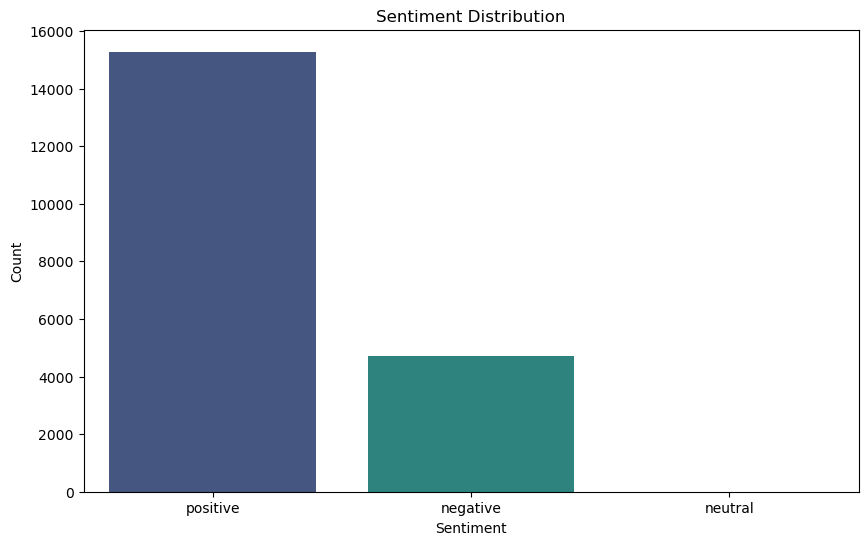

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



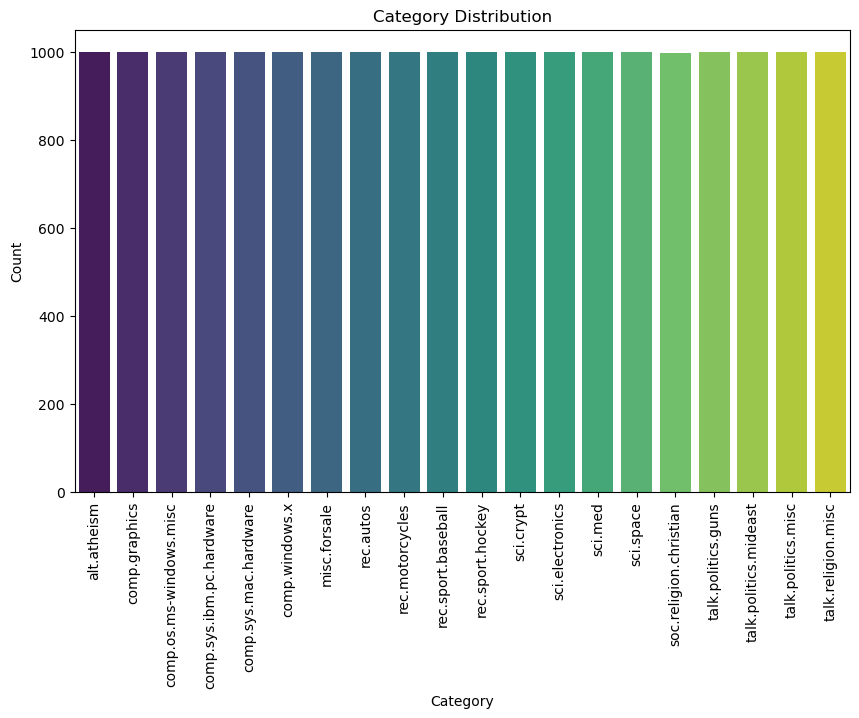

In [20]:
# Plot the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Labels', data=df, palette='viridis')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()




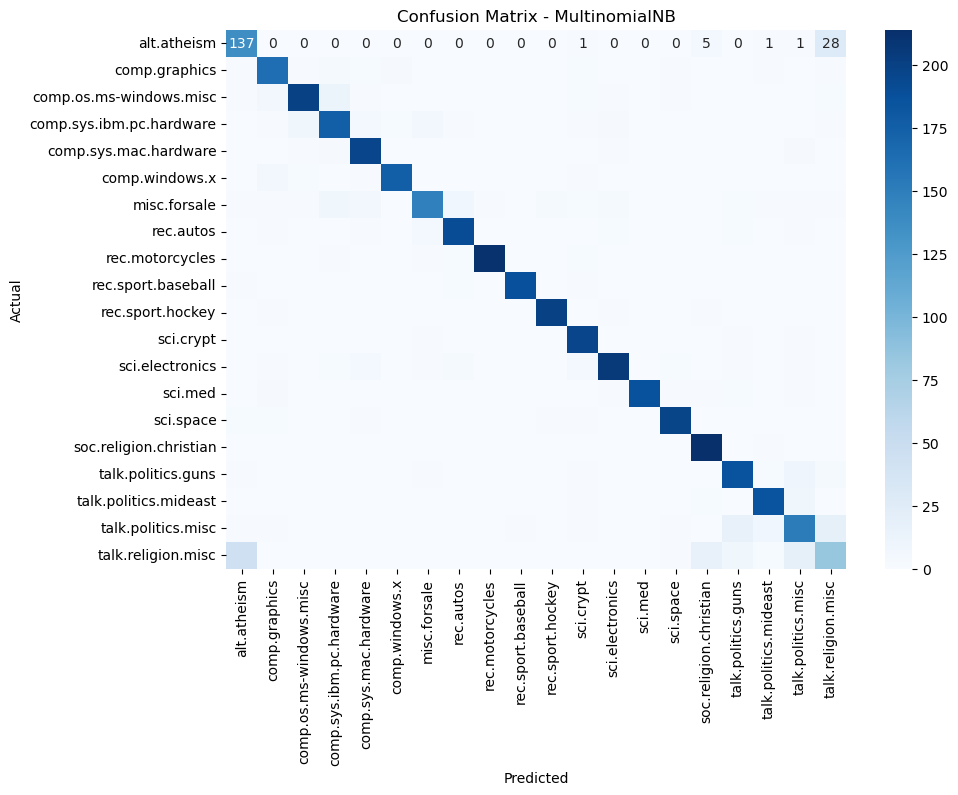

In [21]:
# Confusion Matrix for Multinomial Naive Bayes
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - MultinomialNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()